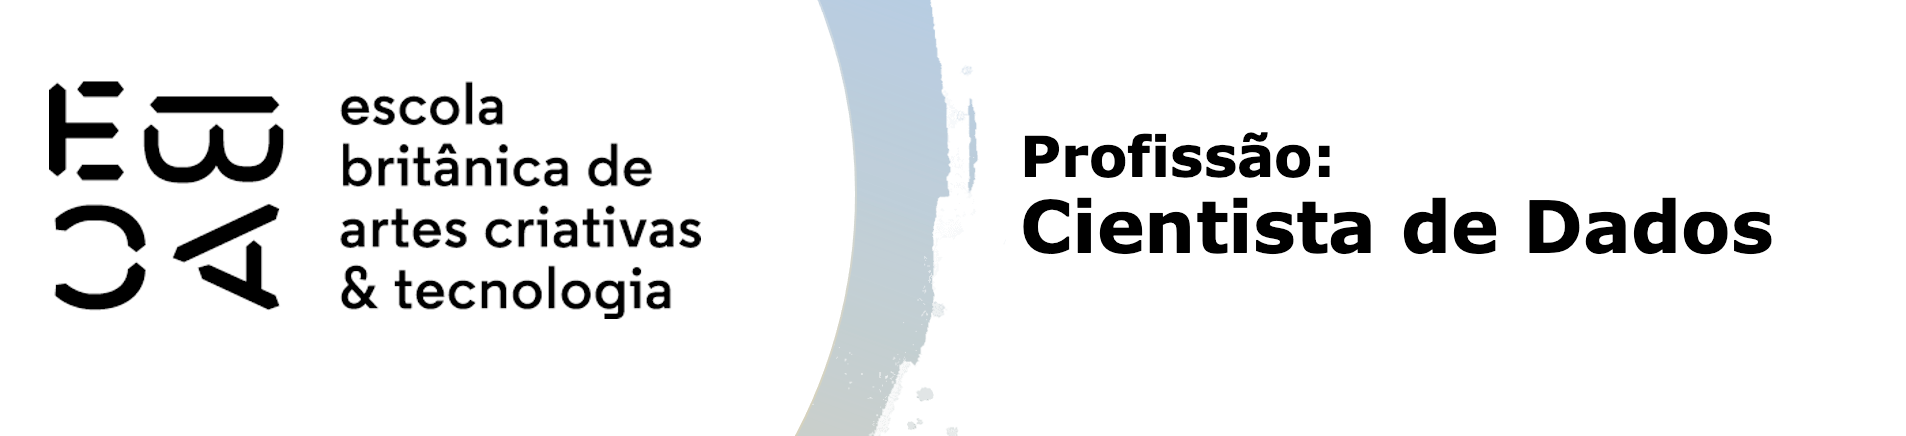

# Tarefa

Com base na tarefa realizada no módulo anterior, vamos fazer um diagnóstico do modelo.

Carregue a base ```previsao_de_renda2.csv```. Separe em uma base de treino e uma base de teste.

Vamos resgatar a melhor versão do modelod e previsão de renda que você fez para esta base. 

- Substitua missings pela média
- Rode novamente o modelo na base de treino (ou desenvolva-o caso não tenha o registro guardado). 

Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```. Já vimos que a variável renda é melhor modelada com a transformação ```log()```, não se esqueça disso.

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split 
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as ss
import unidecode
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

df = pd.read_csv('../Atividade 1/Input/previsao_de_renda_II/previsao_de_renda_II.csv' , index_col = 0)
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 2015-01-01 to 2016-03-01
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  750000 non-null  int64  
 1   sexo                   750000 non-null  object 
 2   posse_de_veiculo       750000 non-null  object 
 3   posse_de_imovel        750000 non-null  object 
 4   qtd_filhos             750000 non-null  int64  
 5   tipo_renda             750000 non-null  object 
 6   educacao               750000 non-null  object 
 7   estado_civil           750000 non-null  object 
 8   tipo_residencia        750000 non-null  object 
 9   idade                  750000 non-null  int64  
 10  tempo_emprego          624240 non-null  float64
 11  qt_pessoas_residencia  750000 non-null  float64
 12  renda                  750000 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 96.2+ MB


In [332]:
df['tempo_emprego'].isnull().sum()

125760

In [333]:
df.fillna({'tempo_emprego' : df['tempo_emprego'].mean()} , inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 2015-01-01 to 2016-03-01
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  750000 non-null  int64  
 1   sexo                   750000 non-null  object 
 2   posse_de_veiculo       750000 non-null  object 
 3   posse_de_imovel        750000 non-null  object 
 4   qtd_filhos             750000 non-null  int64  
 5   tipo_renda             750000 non-null  object 
 6   educacao               750000 non-null  object 
 7   estado_civil           750000 non-null  object 
 8   tipo_residencia        750000 non-null  object 
 9   idade                  750000 non-null  int64  
 10  tempo_emprego          750000 non-null  float64
 11  qt_pessoas_residencia  750000 non-null  float64
 12  renda                  750000 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 96.2+ MB


In [334]:
base_treino = df[:'2015-12-01'].copy()
base_treino['log_renda'] = np.log(base_treino.renda)
base_treino.reset_index(inplace = True)
base_teste = df['2016-01-01':].copy()
base_teste['log_renda'] = np.log(base_teste.renda)
base_teste.reset_index(inplace = True)

In [6]:
variaveis = list(df.columns)
variaveis = [var for var in variaveis if var not in ['index', 'data_ref' , 'renda' , 'log_renda']]
formatacao = 'log_renda ~ ' + '+'.join(variaveis)

In [7]:
variaveis

['sexo',
 'posse_de_veiculo',
 'posse_de_imovel',
 'qtd_filhos',
 'tipo_renda',
 'educacao',
 'estado_civil',
 'tipo_residencia',
 'idade',
 'tempo_emprego',
 'qt_pessoas_residencia']

In [8]:
%%time
res = smf.ols(formatacao , data = base_treino).fit()

CPU times: total: 9.55 s
Wall time: 8.01 s


In [9]:
print(f'R-quadrado: {res.rsquared:.2%}')
res.summary().tables[0]

R-quadrado: 43.78%


Dep. Variable:,log_renda,R-squared:,0.438
Model:,OLS,Adj. R-squared:,0.438
Method:,Least Squares,F-statistic:,1.947e+04
Date:,"Wed, 29 Jan 2025",Prob (F-statistic):,0.00
Time:,11:01:40,Log-Likelihood:,-7.9748e+05
No. Observations:,600000,AIC:,1.595e+06
Df Residuals:,599975,BIC:,1.595e+06
Df Model:,24,,
Covariance Type:,nonrobust,,


## Verifique as suposições do modelo

Faça uma análise para avaliar as suposições básicas:

- Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?
- Verifique a independência dos resíduos
    - Faça um gráfico dos resíduos versus os valores preditos
    - Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
    - Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência
- Avalie se a variância da variável resposta parece ser conforme os valores previstos.

Você considera que as suposições estão atendidas? Há algum impacto em eventuais desvios?

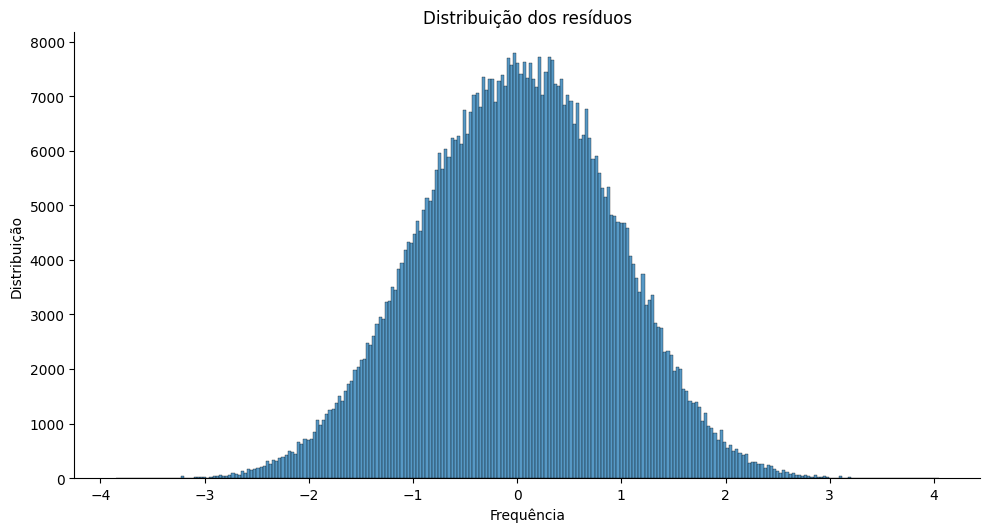

In [10]:
sns.displot(res.resid , height= 5 , aspect= 2)
plt.title('Distribuição dos resíduos')
plt.xlabel('Frequência')
plt.ylabel('Distribuição')

plt.show()

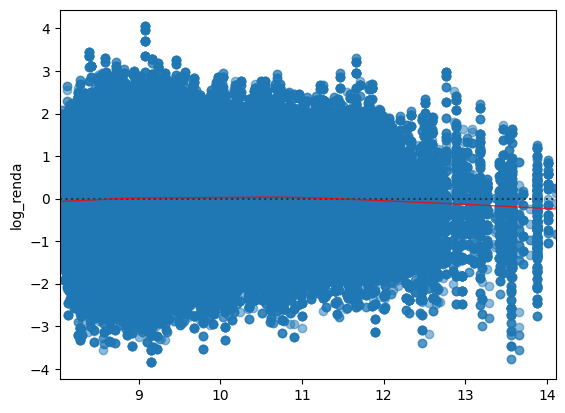

CPU times: total: 6min 22s
Wall time: 6min 28s


In [11]:
%%time
sns.residplot(x=res.predict(), y = base_treino['log_renda'], data=base_treino[variaveis], lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plt.show()

Não parece haver um padrão relevante na distribuição dos resíduos.

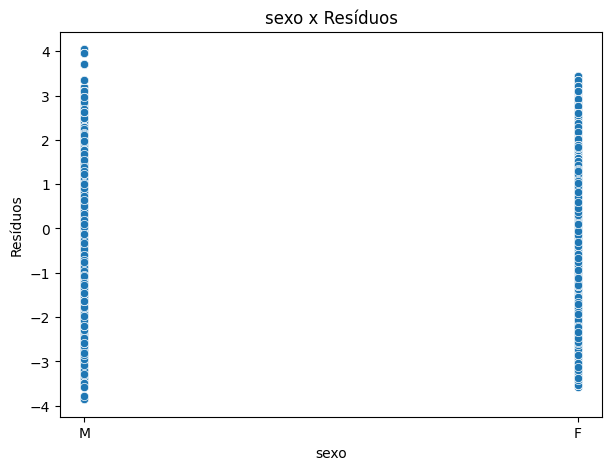

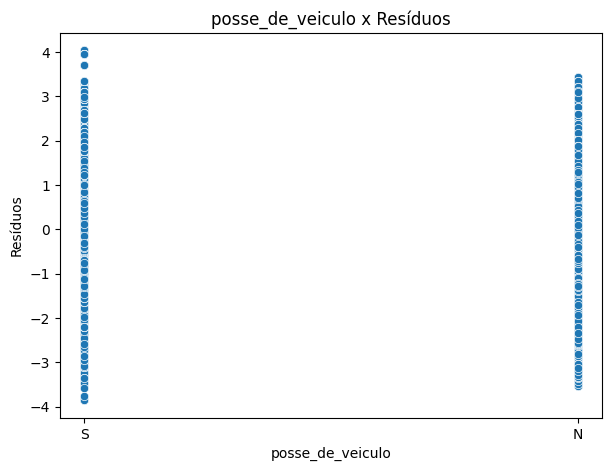

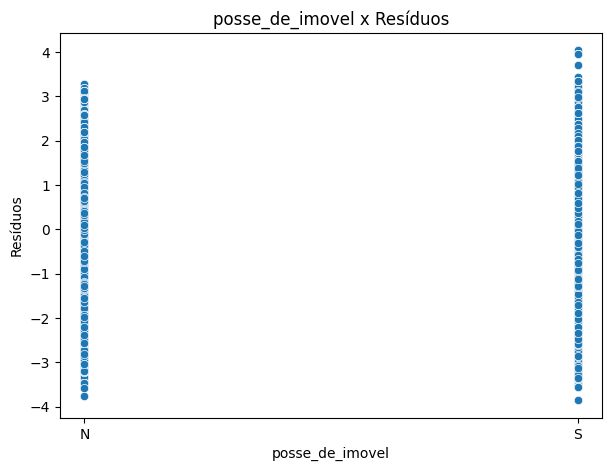

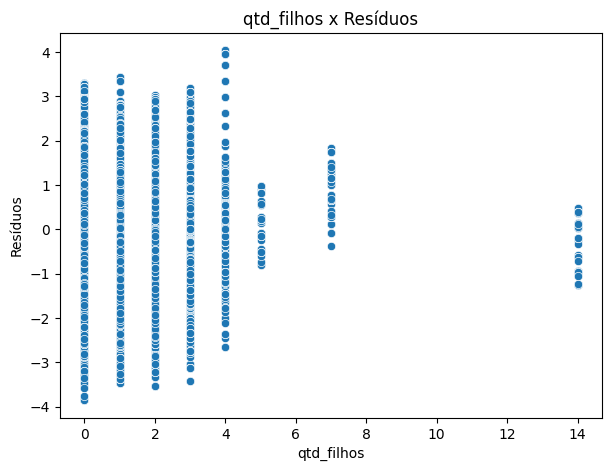

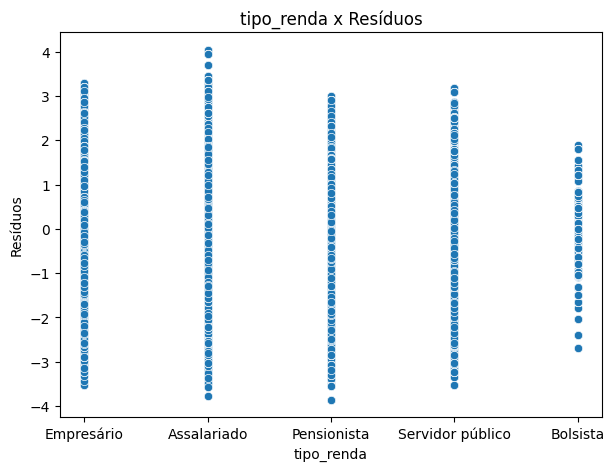

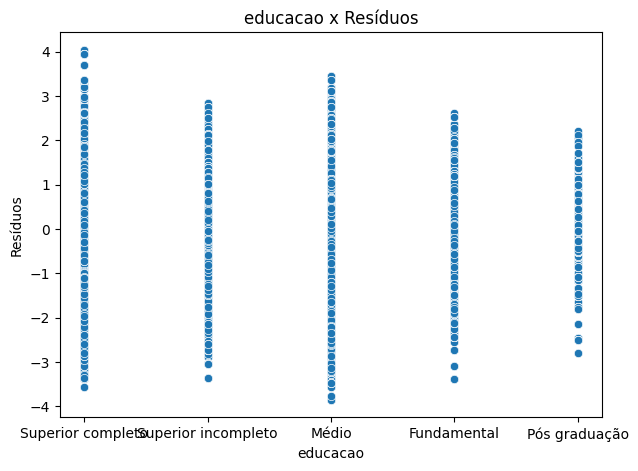

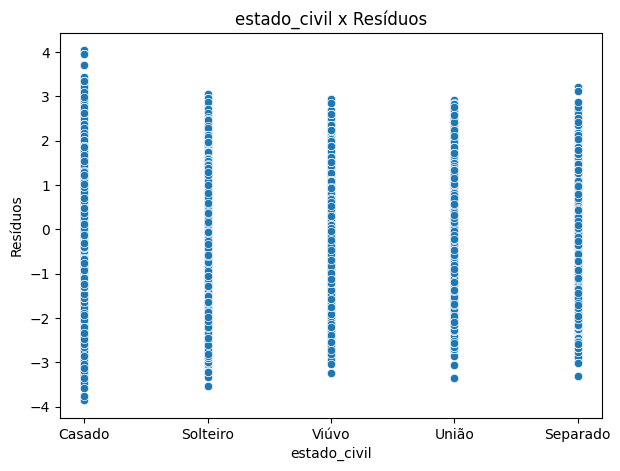

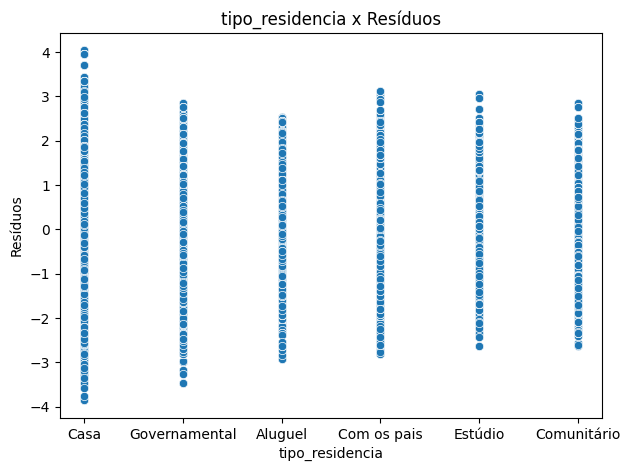

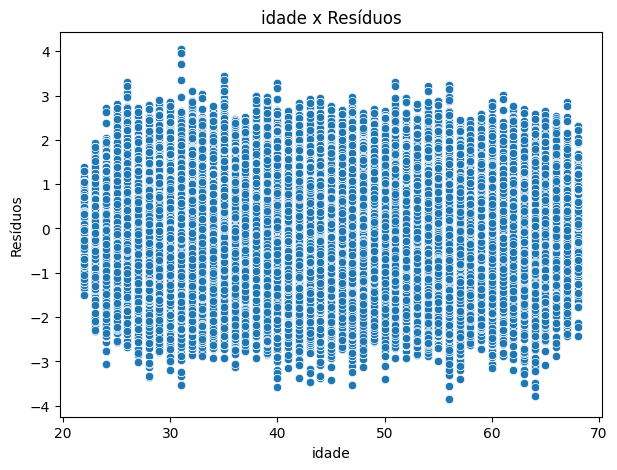

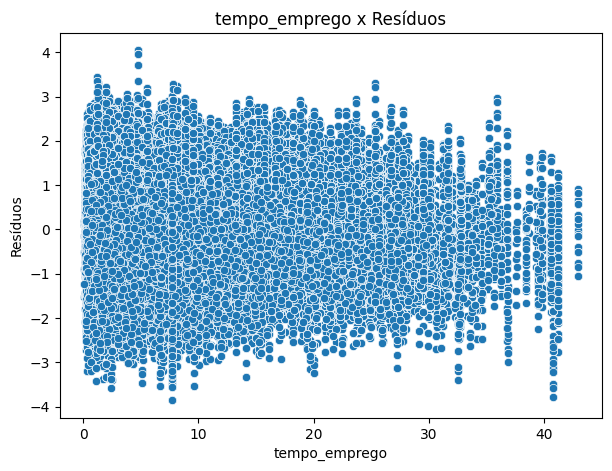

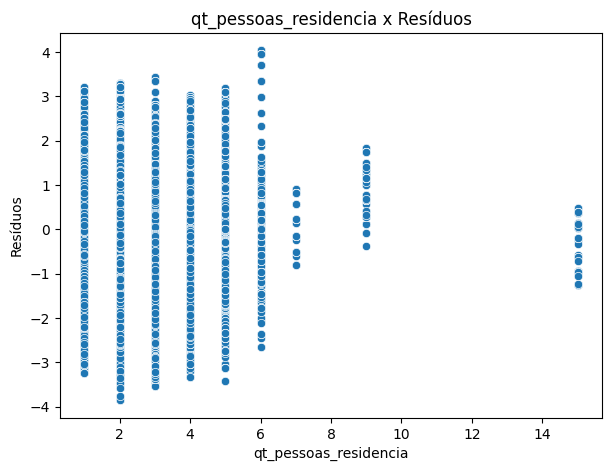

In [12]:
for var in variaveis:
    plt.figure(figsize = (7 , 5))
    sns.scatterplot(x = base_treino[var] , y = res.resid)
    plt.title('{} x Resíduos'.format(var))
    plt.ylabel('Resíduos')
    
    plt.show()

## Outliers

Avalie os *studentized residuals*, verifique se há pontos que parecem ser discrepantes.

Avalie se há pontos influentes.

A base de treino é muito extensa e dificulta o desempenho de análise de outliers , por isso faremos uma base de amostragem a partir dela.

In [31]:
variaveis_categoricas = base_treino.select_dtypes(include=['object', 'category']).columns.tolist()
variaveis_numericas = base_treino.select_dtypes(include=['float64', 'int']).columns.tolist()
variaveis_numericas = [var for var in variaveis_numericas if var not in ['index', 'data_ref' , 'renda' , 'log_renda' , 'stud_resid']]

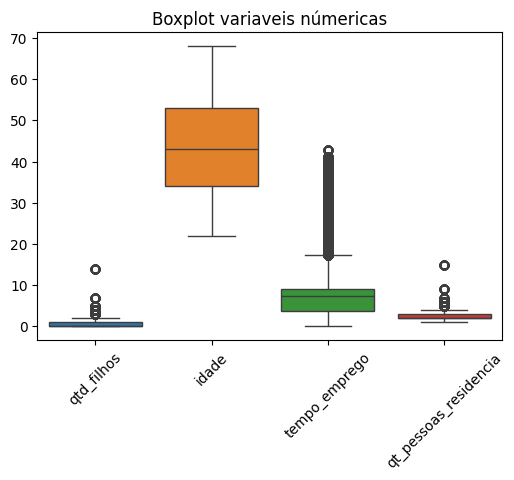

In [14]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(base_treino[variaveis] , native_scale= True)
ax.set_title(f'Boxplot variaveis númericas')
plt.xticks(rotation = 45)
plt.show()

    

Observando os gráficos, a variável que mais chama atenção é a variável tempo_emprego. Após algumas tentativas, torna-se inviável a análise de outliers em todas as variáveis do DF, principalmente pelo tempo de processamento. Portanto, faremos a análise a partir do tempo_emprego.

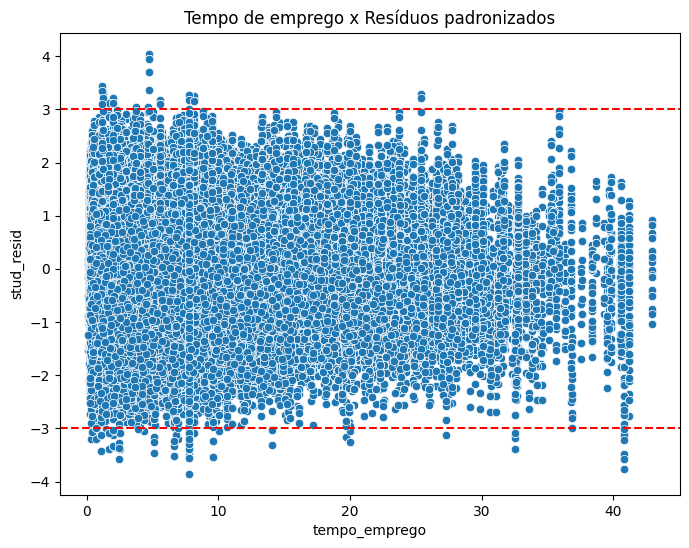

In [15]:
base_treino['stud_resid'] = res.resid
plt.figure(figsize = (8 , 6))
sns.scatterplot(x = 'tempo_emprego' , y = 'stud_resid' , data = base_treino)
plt.title('Tempo de emprego x Resíduos padronizados')
plt.axhline(y=3, color='r', linestyle='--', label='Limite superior')
plt.axhline(y=-3, color='r', linestyle='--', label='Limite inferior')

plt.show()

In [16]:
outliers_index = []
for index, residuo in base_treino['stud_resid'].items():
    if residuo > 3 or residuo < -3:
        outliers_index.append(index)

        

In [17]:
df_outliers = base_treino.iloc[outliers_index]

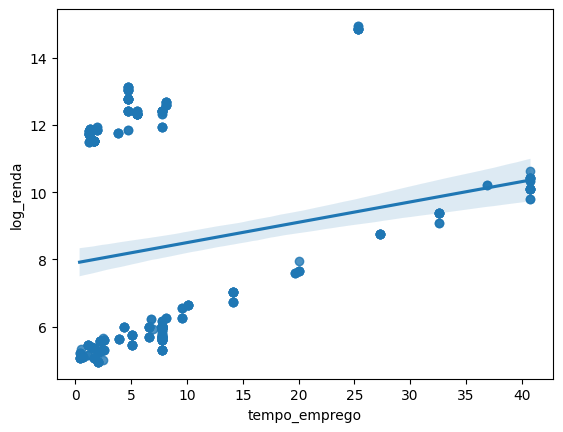

In [18]:
sns.regplot(y='log_renda', x='tempo_emprego', data=df_outliers);

plt.show()

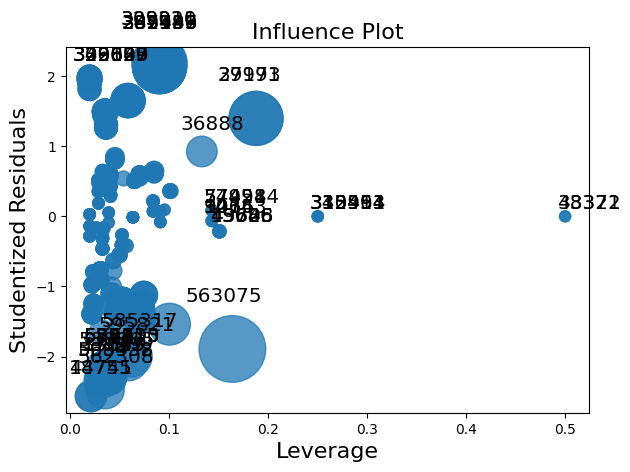

In [19]:
res_outliers = smf.ols(formatacao , data = df_outliers).fit()
fig = sm.graphics.influence_plot(res_outliers, criterion="cooks")
fig.tight_layout(pad=1.0)

O objetivo desta regressão e visualização foi exclusivamente analisar a distribuição dos outliers e compreender o comportamento dos dados dentro do subconjunto formado apenas por eles.
Essa abordagem não tem como propósito influenciar ou generalizar resultados para o conjunto de dados completo, mas sim fornecer insights específicos sobre os pontos atípicos. A análise se concentra exclusivamente nos outliers para investigar possíveis padrões ou características distintas que possam existir nesse grupo, sem impacto direto sobre o modelo ou a análise do restante dos dados.

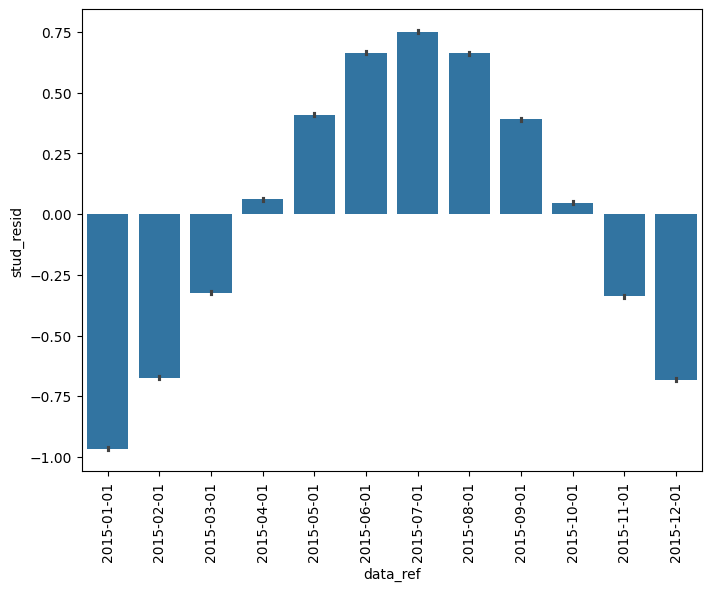

In [23]:
plt.figure(figsize = (8 ,6))
sns.barplot(x = 'data_ref' , y = 'stud_resid' , data = base_treino)
plt.xticks(rotation = 90)

plt.show()

## Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman
- VIF

#### Correlação de Pearson

In [39]:
corr_pearson = base_treino[variaveis_numericas].corr() # Correlação de pearson
corr_pearson

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia
qtd_filhos,1.000000,-0.370938,-0.073517,0.890209
idade,-0.370938,1.000000,0.251930,-0.341455
tempo_emprego,-0.073517,0.251930,1.000000,-0.062986
qt_pessoas_residencia,0.890209,-0.341455,-0.062986,1.000000


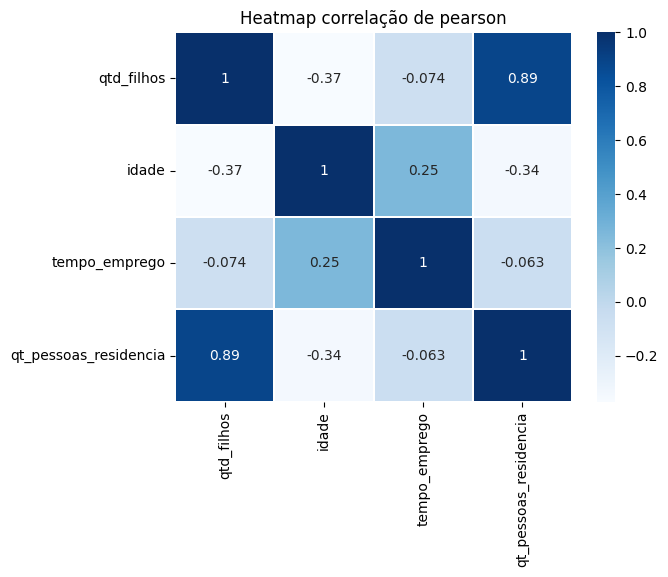

In [92]:
plt.figure()
sns.heatmap(corr_pearson , annot = True , linewidths= 0.2 , cmap = 'Blues')
plt.title('Heatmap correlação de pearson')
plt.show()

#### Correlação de Spearman

In [44]:
corr_spearman = base_treino[variaveis_numericas].corr(method = 'spearman') # Correlação de spearman
corr_spearman

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia
qtd_filhos,1.000000,-0.415384,-0.090583,0.828570
idade,-0.415384,1.000000,0.301418,-0.350081
tempo_emprego,-0.090583,0.301418,1.000000,-0.058691
qt_pessoas_residencia,0.828570,-0.350081,-0.058691,1.000000


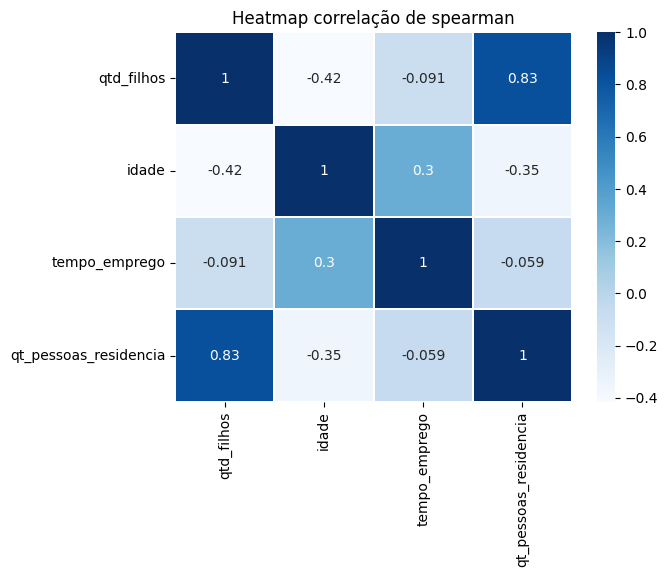

In [93]:
plt.figure()
sns.heatmap(corr_spearman , annot = True , linewidths= 0.2 , cmap = 'Blues')
plt.title('Heatmap correlação de spearman')
plt.show()

#### Associação de crammer

In [85]:
def cramers_corrected_stat(x,y):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    result=-1
    if len(x.value_counts())==1 :
        print("First variable is constant")
    elif len(y.value_counts())==1:
        print("Second variable is constant")
    else:   
        conf_matrix=pd.crosstab(x, y)

        if conf_matrix.shape[0]==2:
            correct=False
        else:
            correct=True

        chi2 = ss.chi2_contingency(conf_matrix, correction=correct)[0]

        n = sum(conf_matrix.sum())
        phi2 = chi2/n
        r,k = conf_matrix.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        result=np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
        return result

def cram(x, y, max_cat=5):
    if (np.dtype(x) in {np.dtype('float64'), np.dtype('int64')}) and (len(np.unique(x)) > max_cat):
        x_ = pd.qcut(x, max_cat, duplicates='drop')  # Correção aqui
    else:
        x_ = x
    
    if (np.dtype(y) in {np.dtype('float64'), np.dtype('int64')}) and (len(np.unique(y)) > max_cat):
        y_ = pd.qcut(y, max_cat, duplicates='drop')  # Correção aqui
    else:
        y_ = y
    
    return cramers_corrected_stat(x_, y_)

In [86]:
x = base_treino.tempo_emprego
y = base_treino.sexo

cram(x, y, 5)

0.15790005214889405

In [87]:
base_cram = base_treino[variaveis]
base_cram.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia
0,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0
1,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0
2,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0
3,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0
4,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0


In [102]:
%%time
# Construir uma matriz vazia para acomodar as associações
matriz_cramer = pd.DataFrame(np.zeros((len(variaveis),len(variaveis))), 
             columns=variaveis, 
             index=variaveis)

# Calcular as associações
for var1 in variaveis:
    for var2 in variaveis:
        matriz_cramer.loc[var1, var2] = cram(base_cram[var1], base_cram[var2], 5)
        
matriz_cramer.head()

CPU times: total: 1min 10s
Wall time: 1min 10s


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia
sexo,1.000000,0.367391,0.055238,0.090573,0.190153,0.021655,0.170204,0.095631,0.212354,0.157900,0.139710
posse_de_veiculo,0.367391,1.000000,0.024697,0.081308,0.153018,0.099485,0.168568,0.051366,0.179330,0.123384,0.131668
posse_de_imovel,0.055238,0.024697,1.000000,0.012197,0.098883,0.056585,0.052602,0.211402,0.134602,0.078671,0.011733
qtd_filhos,0.090573,0.081308,0.012197,1.000000,0.153097,0.045958,0.151308,0.036960,0.294349,0.097690,0.977571
tipo_renda,0.190153,0.153018,0.098883,0.153097,1.000000,0.093570,0.106913,0.061139,0.369565,0.366814,0.176776


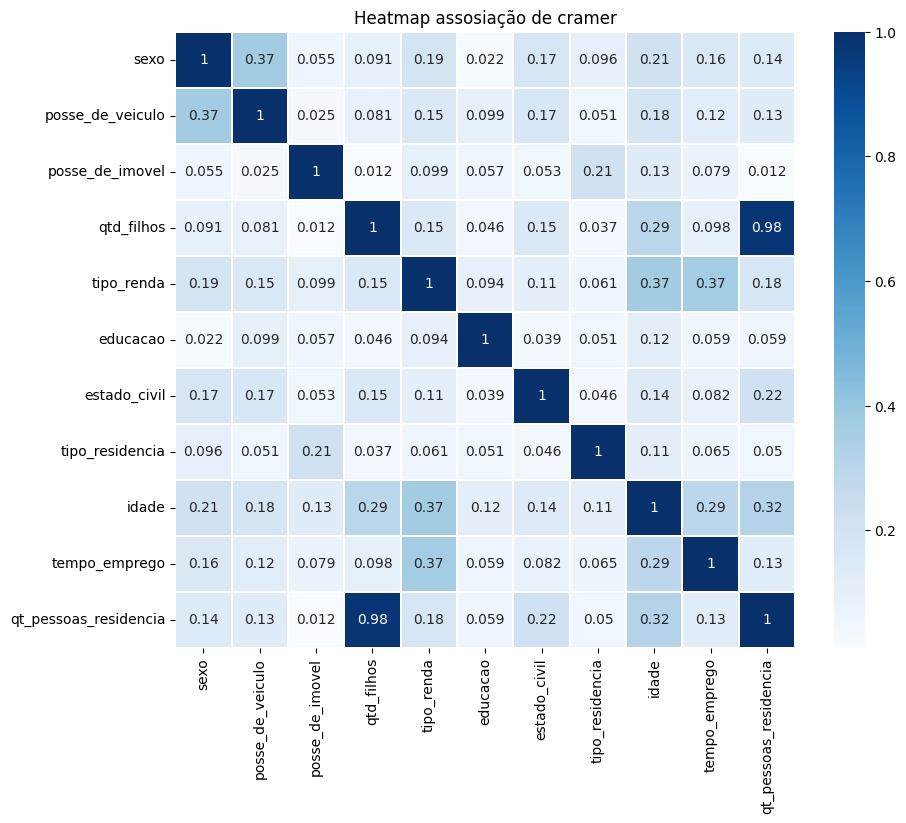

In [95]:

plt.figure(figsize = (10 , 8))
sns.heatmap(matriz_cramer , annot = True , linewidths= .2 , cmap = 'Blues')
plt.title('Heatmap assosiação de cramer')

plt.show()

In [ ]:
As variavéis com maior associação são qtd_filhos e qt_pessoas_residencia.

#### VIF

In [264]:
df_dum = pd.get_dummies(base_treino[variaveis] , drop_first= True)
df_dum = df_dum.astype('float64')
df_dum.head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,sexo_M,posse_de_veiculo_S,posse_de_imovel_S,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,0.0,47.0,16.717808,2.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,30.0,9.600000,2.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,28.0,8.208219,2.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2.0,44.0,1.301370,4.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2.0,33.0,1.254795,4.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [243]:
%%time
vars_vif = pd.DataFrame()
vars_vif["VIF Factor"] = [vif(df_dum, i) for i in range(df_dum.shape[1])]
vars_vif["Feature"] = df_dum.columns

CPU times: total: 1min 6s
Wall time: 23.2 s


In [244]:
vars_vif.round(2).sort_values(by = 'VIF Factor' , ascending = False)

,VIF Factor,Feature
3,241.89,qt_pessoas_residencia
19,64.24,tipo_residencia_Casa
11,52.80,educacao_Médio
1,34.68,idade
0,34.58,qtd_filhos
13,28.61,educacao_Superior completo
16,5.83,estado_civil_Solteiro
14,4.34,educacao_Superior incompleto
20,4.10,tipo_residencia_Com os pais
15,3.48,estado_civil_Separado


In [277]:
df_dum.columns = df_dum.columns.str.replace(" ", "_")
df_dum.columns = [unidecode.unidecode(col) for col in df_dum.columns]

variaveis_dum = df_dum.columns.tolist()

#Tirando as variáveis com maior multicolinearidades
variaveis_dum = [var for var in variaveis_dum if var not in ["qt_pessoas_residencia" , 'educacao_Medio', 'tipo_residencia_Casa' , 'log_renda']]
df_dum['log_renda'] = base_treino.log_renda


formatacao_dum = 'log_renda ~ ' + ' + '.join(variaveis_dum)


In [276]:
r1 = smf.ols(formatacao_dum, data = df_dum ).fit()
r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                 2.224e+04
Date:                Wed, 29 Jan 2025   Prob (F-statistic):               0.00
Time:                        19:27:53   Log-Likelihood:            -7.9754e+05
No. Observations:              600000   AIC:                         1.595e+06
Df Residuals:                  599978   BIC:                         1.595e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         7.8972      0.007   1090.847      0.000       7.883       7.911
qtd_filhos                        0.0052      0.002      2.935      0.003       0.002       0.009
idade                             0.0041      0.000     26.547      0.000       0.004       0.004
tempo_emprego                     0.1290      0.000    619.676      0.000       0.129       0.129
sexo_M                            0.1360      0.003     48.811      0.000       0.131       0.141
posse_de_veiculo_S                0.0055      0.003      2.058      0.040       0.000       0.011
posse_de_imovel_S                 0.1845      0.003     71.180      0.000       0.179       0.190
tipo_renda_Bolsista              -0.2167      0.052     -4.132      0.000      -0.320      -0.114
tipo_renda_Empresario             0.1450      0.003     48.455      0.000       0.139       0.151
tipo_renda_Pensionista           -0.2979      0.004    -69.910      0.000      -0.306      -0.290
tipo_renda_Servidor_publico       0.1333      0.004     30.271      0.000       0.125       0.142
educacao_Pos_graduacao            0.1230      0.036      3.369      0.001       0.051       0.194
educacao_Superior_completo        0.0932      0.003     35.812      0.000       0.088       0.098
educacao_Superior_incompleto      0.0143      0.006      2.301      0.021       0.002       0.027
estado_civil_Separado             0.0237      0.005      4.554      0.000       0.013       0.034
estado_civil_Solteiro             0.0088      0.004      2.340      0.019       0.001       0.016
estado_civil_Uniao                0.0091      0.005      2.027      0.043       0.000       0.018
estado_civil_Viuvo                0.0082      0.006      1.339      0.181      -0.004       0.020
tipo_residencia_Com_os_pais       0.0299      0.006      5.051      0.000       0.018       0.041
tipo_residencia_Comunitario      -0.0560      0.018     -3.121      0.002      -0.091      -0.021
tipo_residencia_Estudio          -0.0540      0.014     -3.868      0.000      -0.081      -0.027
tipo_residencia_Governamental    -0.0072      0.007     -1.055      0.292      -0.021       0.006
==============================================================================
Omnibus:                     1086.186   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              956.912
Skew:                          -0.053   Prob(JB):                    1.62e-208
Kurtosis:                       2.835   Cond. No.                     2.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+03. This might ind

Consegui retirar 3 variaveis sem ter uma perda relevante no R quadrado.

## Ajustes

Faça os ajustes que julgar necessários no modelo e compare as métricas de desempenho do modelo original e ajustado na base de testes.

In [330]:
base_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   data_ref               150000 non-null  object 
 1   index                  150000 non-null  int64  
 2   sexo                   150000 non-null  object 
 3   posse_de_veiculo       150000 non-null  object 
 4   posse_de_imovel        150000 non-null  object 
 5   qtd_filhos             150000 non-null  int64  
 6   tipo_renda             150000 non-null  object 
 7   educacao               150000 non-null  object 
 8   estado_civil           150000 non-null  object 
 9   tipo_residencia        150000 non-null  object 
 10  idade                  150000 non-null  int64  
 11  tempo_emprego          150000 non-null  float64
 12  qt_pessoas_residencia  150000 non-null  float64
 13  renda                  150000 non-null  float64
 14  log_renda              150000 non-nu

In [327]:
base_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   data_ref               150000 non-null  object 
 1   index                  150000 non-null  int64  
 2   sexo                   150000 non-null  object 
 3   posse_de_veiculo       150000 non-null  object 
 4   posse_de_imovel        150000 non-null  object 
 5   qtd_filhos             150000 non-null  int64  
 6   tipo_renda             150000 non-null  object 
 7   educacao               150000 non-null  object 
 8   estado_civil           150000 non-null  object 
 9   tipo_residencia        150000 non-null  object 
 10  idade                  150000 non-null  int64  
 11  tempo_emprego          124971 non-null  float64
 12  qt_pessoas_residencia  150000 non-null  float64
 13  renda                  150000 non-null  float64
 14  log_renda              150000 non-nu

#### Modelo teste original

In [346]:
df_test = base_teste.drop(columns = ['data_ref' , 'index' , 'log_renda' , 'renda'])
df_test_dum = pd.get_dummies(df_test)
df_test_dum.columns = df_test_dum.columns.str.replace(" ", "_")
df_test_dum.columns = [unidecode.unidecode(col) for col in df_test_dum.columns]

In [347]:
variaveis_test = list(df_dum_test.columns)
df_test_dum['log_renda'] = base_teste.log_renda


formatacao_test = 'log_renda ~ ' + ' + '.join(variaveis_test)

In [351]:
res_test = smf.ols(formatacao_test , df_test_dum).fit()
res_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     7573.
Date:                Wed, 29 Jan 2025   Prob (F-statistic):               0.00
Time:                        21:55:59   Log-Likelihood:            -1.6641e+05
No. Observations:              150000   AIC:                         3.329e+05
Df Residuals:                  149975   BIC:                         3.331e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                              2.444e+09   1.75e+09      1.395      0.163   -9.91e+08    5.88e+09
sexo_F[T.True]                        -6.883e+09   4.93e+09     -1.395      0.163   -1.66e+10    2.79e+09
sexo_M[T.True]                        -6.883e+09   4.93e+09     -1.395      0.163   -1.66e+10    2.79e+09
posse_de_veiculo_N[T.True]             1.282e+09   9.19e+08      1.395      0.163    -5.2e+08    3.08e+09
posse_de_veiculo_S[T.True]             1.282e+09   9.19e+08      1.395      0.163    -5.2e+08    3.08e+09
posse_de_imovel_N[T.True]              1.204e+09   8.63e+08      1.395      0.163   -4.88e+08     2.9e+09
posse_de_imovel_S[T.True]              1.204e+09   8.63e+08      1.395      0.163   -4.88e+08     2.9e+09
tipo_renda_Assalariado[T.True]         5.076e+08   3.64e+08      1.395      0.163   -2.06e+08    1.22e+09
tipo_renda_Bolsista[T.True]            5.076e+08   3.64e+08      1.395      0.163   -2.06e+08    1.22e+09
tipo_renda_Empresario[T.True]          5.076e+08   3.64e+08      1.395      0.163   -2.06e+08    1.22e+09
tipo_renda_Pensionista[T.True]         5.076e+08   3.64e+08      1.395      0.163   -2.06e+08    1.22e+09
tipo_renda_Servidor_publico[T.True]    5.076e+08   3.64e+08      1.395      0.163   -2.06e+08    1.22e+09
educacao_Fundamental[T.True]           5.128e+08   3.68e+08      1.395      0.163   -2.08e+08    1.23e+09
educacao_Medio[T.True]                 5.128e+08   3.68e+08      1.395      0.163   -2.08e+08    1.23e+09
educacao_Pos_graduacao[T.True]         5.128e+08   3.68e+08      1.395      0.163   -2.08e+08    1.23e+09
educacao_Superior_completo[T.True]     5.128e+08   3.68e+08      1.395      0.163   -2.08e+08    1.23e+09
educacao_Superior_incompleto[T.True]   5.128e+08   3.68e+08      1.395      0.163   -2.08e+08    1.23e+09
estado_civil_Casado[T.True]            5.049e+08   3.62e+08      1.395      0.163   -2.05e+08    1.21e+09
estado_civil_Separado[T.True]          5.049e+08   3.62e+08      1.395      0.163   -2.05e+08    1.21e+09
estado_civil_Solteiro[T.True]          5.049e+08   3.62e+08      1.395      0.163   -2.05e+08    1.21e+09
estado_civil_Uniao[T.True]             5.049e+08   3.62e+08      1.395      0.163   -2.05e+08    1.21e+09
estado_civil_Viuvo[T.True]             5.049e+08   3.62e+08      1.395      0.163   -2.05e+08    1.21e+09
tipo_residencia_Aluguel[T.True]        4.267e+08   3.06e+08      1.395      0.163   -1.73e+08    1.03e+09
tipo_residencia_Casa[T.True]           4.267e+08   3.06e+08      1.395      0.163   -1.73e+08    1.03e+09
tipo_residencia_Com_os_pais[T.True]    4.267e+08   3.06e+08      1.395      0.163   -1.73e+08    1.03e+09
tipo_residencia_Comunitario[T.True]    4.267e+08   3.06e+08      1.395      0.163   -1.73e+08    1.03e+09
tipo_resi

#### Modelo teste ajustado

In [352]:
df_test_aj = base_teste.drop(columns = ['data_ref' , 'index' , 'log_renda' , 'renda' ])
df_dum_test_aj = pd.get_dummies(df_test_aj)
df_dum_test_aj.columns = df_dum_test_aj.columns.str.replace(" ", "_")
df_dum_test_aj.columns = [unidecode.unidecode(col) for col in df_dum_test_aj.columns]

In [354]:
variaveis_dum_test_aj = list(df_dum_test_aj.columns)
variaveis_dum_test_aj = [var for var in variaveis_dum_test_aj if var not in ["qt_pessoas_residencia" , 'educacao_Medio', 'tipo_residencia_Casa' , 'log_renda']]
df_dum_test_aj['log_renda'] = base_teste.log_renda


formatacao_aj = 'log_renda ~ ' + ' + '.join(variaveis_dum_test_aj)

In [356]:
res_test_aj = smf.ols(formatacao_aj , data = df_dum_test_aj).fit()
res_test_aj.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     7900.
Date:                Wed, 29 Jan 2025   Prob (F-statistic):               0.00
Time:                        21:59:10   Log-Likelihood:            -1.6643e+05
No. Observations:              150000   AIC:                         3.329e+05
Df Residuals:                  149976   BIC:                         3.331e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                              2.867e+09   2.03e+09      1.415      0.157   -1.11e+09    6.84e+09
sexo_F[T.True]                         -6.98e+09   4.93e+09     -1.415      0.157   -1.67e+10    2.69e+09
sexo_M[T.True]                         -6.98e+09   4.93e+09     -1.415      0.157   -1.67e+10    2.69e+09
posse_de_veiculo_N[T.True]              1.53e+09   1.08e+09      1.415      0.157    -5.9e+08    3.65e+09
posse_de_veiculo_S[T.True]              1.53e+09   1.08e+09      1.415      0.157    -5.9e+08    3.65e+09
posse_de_imovel_N[T.True]              1.406e+09   9.94e+08      1.415      0.157   -5.42e+08    3.35e+09
posse_de_imovel_S[T.True]              1.406e+09   9.94e+08      1.415      0.157   -5.42e+08    3.35e+09
tipo_renda_Assalariado[T.True]         6.057e+08   4.28e+08      1.415      0.157   -2.34e+08    1.45e+09
tipo_renda_Bolsista[T.True]            6.057e+08   4.28e+08      1.415      0.157   -2.34e+08    1.45e+09
tipo_renda_Empresario[T.True]          6.057e+08   4.28e+08      1.415      0.157   -2.34e+08    1.45e+09
tipo_renda_Pensionista[T.True]         6.057e+08   4.28e+08      1.415      0.157   -2.34e+08    1.45e+09
tipo_renda_Servidor_publico[T.True]    6.057e+08   4.28e+08      1.415      0.157   -2.34e+08    1.45e+09
educacao_Fundamental[T.True]              0.0022      0.018      0.122      0.903      -0.033       0.038
educacao_Pos_graduacao[T.True]            0.1177      0.056      2.092      0.036       0.007       0.228
educacao_Superior_completo[T.True]        0.1002      0.004     25.321      0.000       0.092       0.108
educacao_Superior_incompleto[T.True]      0.0440      0.010      4.348      0.000       0.024       0.064
estado_civil_Casado[T.True]            5.714e+08   4.04e+08      1.415      0.157    -2.2e+08    1.36e+09
estado_civil_Separado[T.True]          5.714e+08   4.04e+08      1.415      0.157    -2.2e+08    1.36e+09
estado_civil_Solteiro[T.True]          5.714e+08   4.04e+08      1.415      0.157    -2.2e+08    1.36e+09
estado_civil_Uniao[T.True]             5.714e+08   4.04e+08      1.415      0.157    -2.2e+08    1.36e+09
estado_civil_Viuvo[T.True]             5.714e+08   4.04e+08      1.415      0.157    -2.2e+08    1.36e+09
tipo_residencia_Aluguel[T.True]           0.0612      0.016      3.815      0.000       0.030       0.093
tipo_residencia_Com_os_pais[T.True]       0.0301      0.010      3.163      0.002       0.011       0.049
tipo_residencia_Comunitario[T.True]      -0.0773      0.029     -2.683      0.007      -0.134      -0.021
tipo_residencia_Estudio[T.True]          -0.0329      0.023     -1.455      0.146      -0.077       0.011
tipo_residencia_Governamental[T.True]     0.0018      0.011      0.167      0.867      -0.020       0.024
qtd_filho

A base de teste ajustada obteve um aumento significativo em relação a base de teste original e também em relação a base de treino.